合并后的数据：
   商品大类 商品小类     商品名称   商品编号  商品销售价       订单日期          订单编号  订单数量
0  运动配饰   发带   纯色弹力发带  fd003   12.0 2022-01-01  HS2022000001    26
1  运动配饰   发带  糖果色弹力发带  fd004   16.0 2022-01-01  HS2022000002    28
2  运动配饰   手环   篮球运动手环  sh001    8.0 2022-01-01  HS2022000003    20
3  运动配饰   手环  小清新硅胶手环  sh003    6.0 2022-01-01  HS2022000004    35
4  运动上装   背心   跑步运动背心  bx002   39.0 2022-01-01  HS2022000005    60


每月销售金额统计：
    月份      销售金额
0    1  344878.0
1    2  375111.0
2    3  431575.0
3    4  408359.0
4    5  463358.0
5    6  424416.0
6    7  490090.0
7    8  468356.0
8    9  433489.0
9   10  485727.0
10  11  484643.0
11  12  470306.0




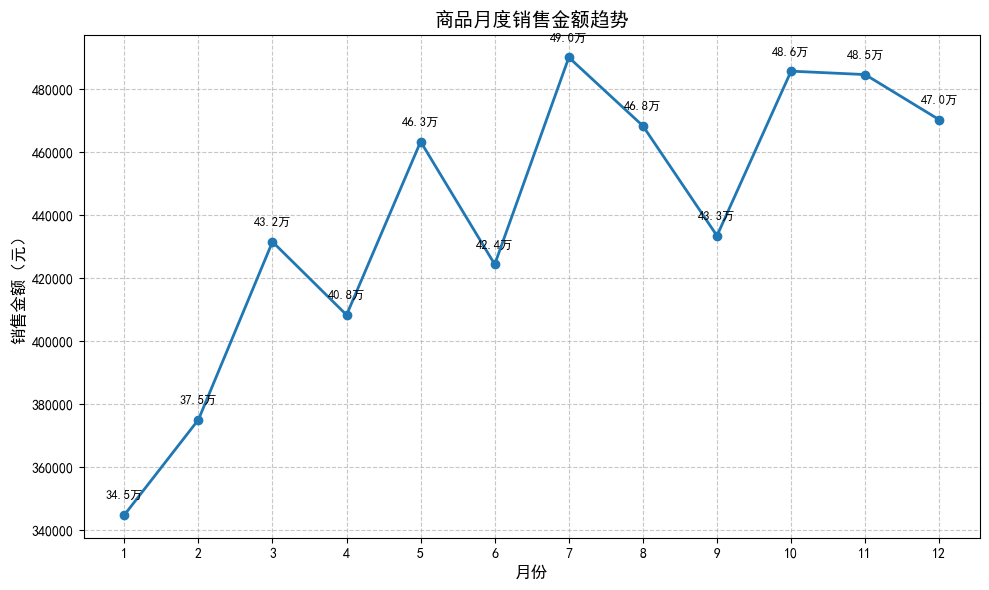

<Figure size 1200x700 with 0 Axes>

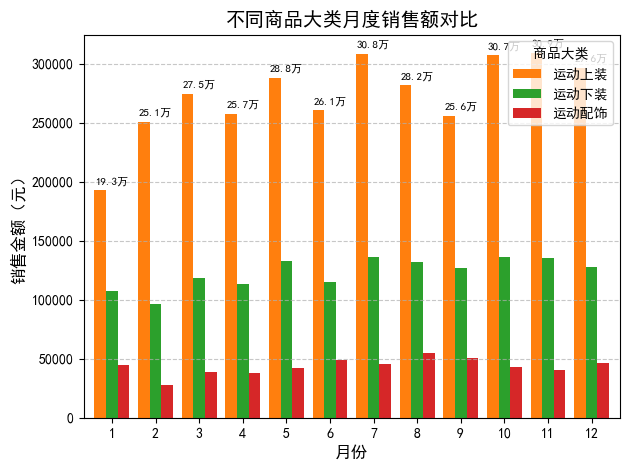

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ========== 题目1：获取数据 ==========
# 定义文件路径（使用原始字符串避免转义问题）
file_path = r"D:\桌面图标\常用文件\课程资料\大二下\数字素养\商品销售数据.xlsx"

# 读取两个工作表（添加parse_dates确保日期格式正确）
data1 = pd.read_excel(file_path, sheet_name='信息表')  # 商品信息表
data2 = pd.read_excel(file_path, sheet_name='销售数据表', parse_dates=['订单日期'])  # 销售数据表

# 按"商品编号"合并数据，保留右表（销售数据表）的全部记录
data_all = pd.merge(data1, data2, on='商品编号', how='right')

# 显示合并后的数据前5行
print("合并后的数据：")
print(data_all.head())
print("\n" + "="*50 + "\n")

# ========== 题目2：分类统计每月销售金额 ==========
# 1. 计算销售金额（商品单价 × 订单数量）
data_all['销售金额'] = data_all['商品销售价'] * data_all['订单数量']

# 2. 提取订单日期的月份
data_all['月份'] = data_all['订单日期'].dt.month

# 3. 按月份分组并汇总销售金额
monthly_sales = data_all.groupby('月份')['销售金额'].sum().reset_index()

# 显示结果
print("每月销售金额统计：")
print(monthly_sales)
print("\n" + "="*50 + "\n")

# ========== 题目3：绘制月度销售趋势折线图 ==========
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(monthly_sales['月份'], monthly_sales['销售金额'], 
         marker='o', linestyle='-', color='#1f77b4', linewidth=2)

# 设置标题和标签
plt.title('商品月度销售金额趋势', fontsize=14)
plt.xlabel('月份', fontsize=12)
plt.ylabel('销售金额（元）', fontsize=12)

# 设置坐标轴
plt.xticks(range(1, 13))  # 1-12月
plt.grid(True, linestyle='--', alpha=0.7)

# 添加数据标签
for x, y in zip(monthly_sales['月份'], monthly_sales['销售金额']):
    plt.text(x, y+5000, f'{y/10000:.1f}万', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('月度销售趋势.png')  # 保存图表
plt.show()

print("\n" + "="*50 + "\n")

# ========== 题目4：分析商品大类月度销售额 ==========
# 1. 按月份和商品大类分组汇总
category_sales = data_all.groupby(['月份', '商品大类'])['销售金额'].sum().unstack()

# 2. 绘制柱状图
plt.figure(figsize=(12, 7))

# 绘制分组柱状图
category_sales.plot(kind='bar', width=0.8, 
                   color=['#ff7f0e', '#2ca02c', '#d62728'])

# 设置标题和标签
plt.title('不同商品大类月度销售额对比', fontsize=14)
plt.xlabel('月份', fontsize=12)
plt.ylabel('销售金额（元）', fontsize=12)
plt.xticks(rotation=0)  # 横轴标签水平显示

# 添加图例和网格
plt.legend(title='商品大类', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加数据标签（每月只显示最大值避免拥挤）
for month in range(12):
    max_val = category_sales.iloc[month].max()
    plt.text(month, max_val+5000, f'{max_val/10000:.1f}万', 
             ha='center', fontsize=8)

plt.tight_layout()
plt.savefig('商品大类销售对比.png')  # 保存图表
plt.show()